# Central Limit Theorem {-}

Central Limit Theorem suggests that if you randomly draw a sample of e.g. 10000 numbers, this sample itself might not be normally distributed. But if you now repeat the experiment 1000 times, then the 1000 means of those 1000 samples (of 10000 numbers) will make up a normal distribution.

Mean and standard deviation of uniform distribution:
$$
\mu_x = \frac{a + b}{2}, \quad \sigma_x = \sqrt{\frac{(b - a)^2}{12}}, \quad a < x < b
$$

Distribution of the mean:
$$
\bar{x} \sim N(\mu_x, \frac{\sigma_x}{\sqrt{n}})
$$

Mean: -0.005 (0.000)
Std: 0.591 (0.577)


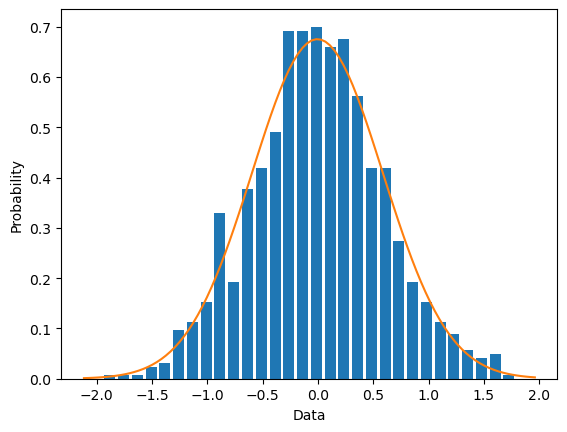

In [1]:
from numpy import empty, mean, std, sqrt, linspace
from numpy.random import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt

# Number of experiments
k = 1000

# Number of samples
n = 10000

# Domain of uniform distribution
a = -100; b = 100

# Container for all experiments
X = empty([k, n])

# Draw n samples k times from a uniform distribution on interval <a, b>
for i in range(0, k):
    X[i, :] = uniform(a, b, n)
    
# Theoretical mean and standard deviation from uniform distribution
mux = (a + b)/2
sigmax = sqrt((b - a)**2/12)

# Compute mean of each of the k experiments (i.e. sampling distribution of sampled means)
Xm = mean(X, axis=1)

# Compute the distribution of the mean of sampled means
mu = mean(Xm)
sigma = std(Xm)
print(f"Mean: {mu:.3f} ({mux:.3f})")
print(f"Std: {sigma:.3f} ({sigmax/sqrt(n):.3f})")

# Plot histogram of sample means
plt.hist(Xm, density=True, rwidth=0.8, bins=30)
plt.ylabel('Probability')
plt.xlabel('Data')

# Plot the corresponding normal distribution pdf
xmin, xmax = plt.xlim()
x = linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p)
plt.show()